In [2]:
file_prefix <- "ch16.1"
reuse_fit <- T
source("preset.R")

input_file <- "data/TwoGroupIQ.csv"

In [3]:
data <- read_csv("data/TwoGroupIQ.csv")
stan_data <- list(
  N = nrow(data), 
  Y = data$Score, 
  Y_MEAN = mean(data$Score), 
  Y_SD = sd(data$Score)
)

Parsed with column specification:
cols(
  Score = col_double(),
  Group = col_character()
)



In [4]:
init <- function() {
  list(
    mu = rnorm(1, stan_data$Y_MEAN, stan_data$Y_SD * 2), 
    sigma = runif(n = 1, stan_data$Y_SD / 1000, stan_data$Y_SD * 1000)
  )
}
fit <- stan(file = "model/ch16.1.stan", data = stan_data, init = init, seed = 1234, 
            chains = 4, warmup = 200, iter = 6000, thin = 1)

In [5]:
fit

Inference for Stan model: ch16.
4 chains, each with iter=6000; warmup=200; thin=1; 
post-warmup draws per chain=5800, total post-warmup draws=23200.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
mu     104.12    0.01 2.07  100.04  102.71  104.14  105.53  108.17 19250    1
sigma   22.66    0.01 1.51   19.97   21.59   22.56   23.62   25.88 13196    1
lp__  -430.68    0.01 1.01 -433.39 -431.07 -430.38 -429.97 -429.69  9896    1

Samples were drawn using NUTS(diag_e) at Wed Jan 15 22:15:05 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [ ]:
#ggmcmc(ggs(fit), file = plot_file_name("diag"))

In [7]:
# check result
res <- fit_to_tibble(fit) %>% 
  mutate(effect_size = (mu - 100) / sigma)

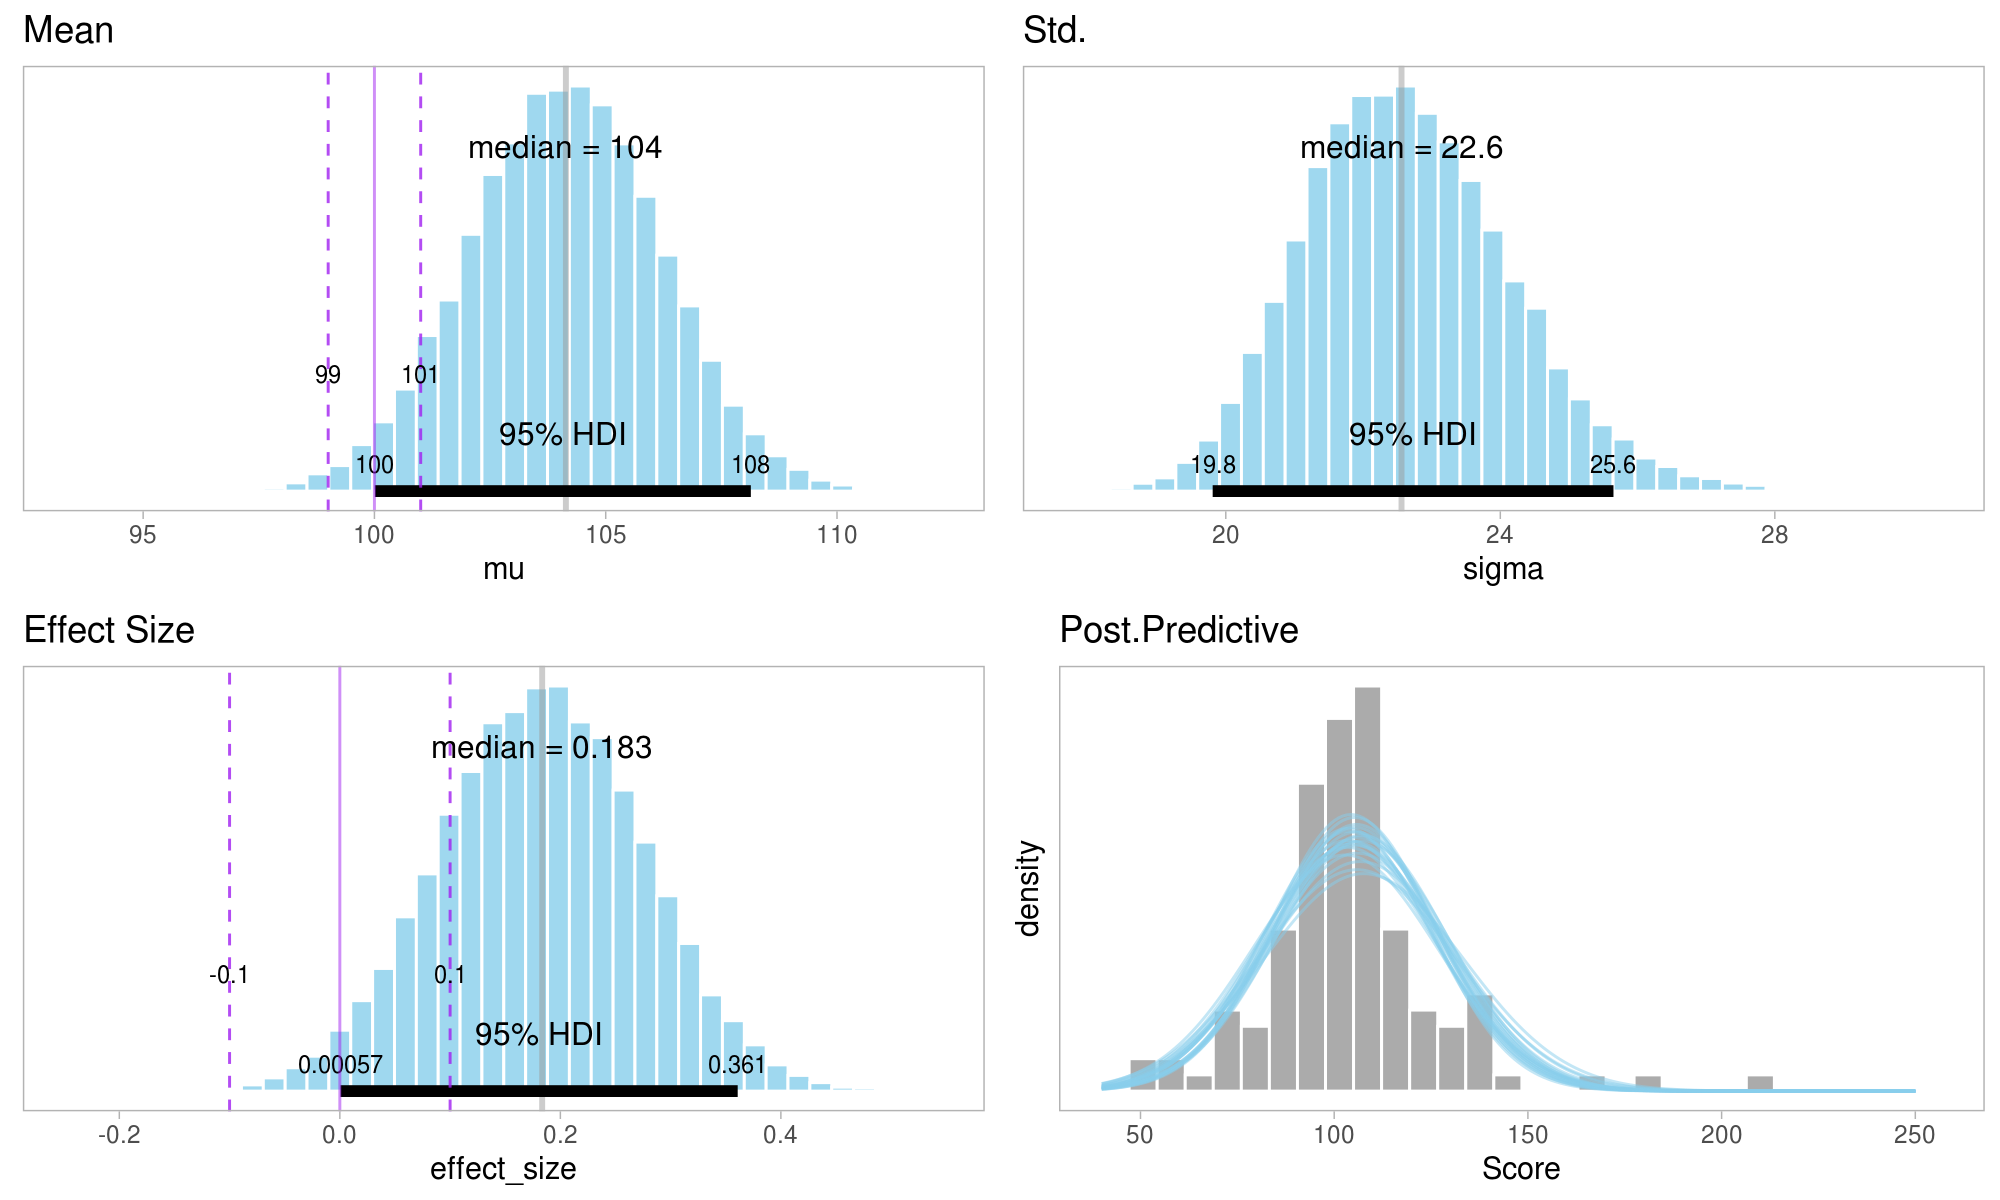

In [10]:
set_plot_size(10, 6)
grid.arrange(
  plot_post(res, "mu", rope = c(99, 101), title = "Mean"), 
  plot_post(res, "sigma", title = "Std."), 
  plot_post(res, "effect_size", rope = c(-0.1, 0.1), title = "Effect Size"), 
  res %>% sample_n(20) %>% 
    make_line_grid(xs = seq(40, 250, length = 200), y_func = dnorm(Score, mu, sigma), x_name = "Score") %>% 
    ggplot(aes(Score)) + 
      geom_histogram(data = data, bins = 30, aes(y = ..density..), color = "white", alpha = 0.5) + 
      geom_line(aes(y = Y, group = line_id), color = "skyblue", alpha = 0.5) + 
      labs(title = "Post.Predictive") + 
      theme_post()
)